In [1]:
import time
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [31]:
d = 10
mu = np.zeros(d)
var = np.ones(d) * 0.01
var[0] = 1.0

In [32]:
from models import Gaussian, Riemannian

In [33]:
toy = Riemannian(mu, var)

In [34]:
truth = toy.sample(1000)

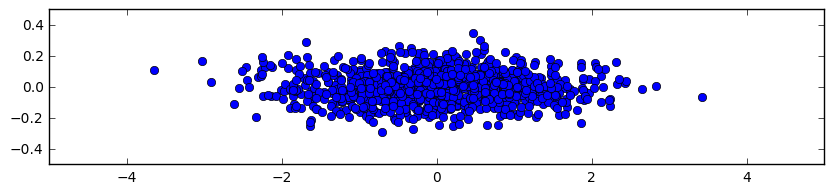

In [35]:
fig = plt.figure(figsize=(10, 2), dpi=200)
plt.xlim(-5, 5)
plt.ylim(-0.5, 0.5)
plt.plot(truth[:, 0], truth[:, 1], 'o')

In [36]:
from sampler import hamiltonian

In [37]:
HMC_draws = hamiltonian(toy, 2000, 5, 0.01)[0]

200 iterations with acceptance probability 0.72
400 iterations with acceptance probability 0.77
600 iterations with acceptance probability 0.785
800 iterations with acceptance probability 0.775
1000 iterations with acceptance probability 0.78
1200 iterations with acceptance probability 0.775
1400 iterations with acceptance probability 0.78
1600 iterations with acceptance probability 0.76
1800 iterations with acceptance probability 0.8
2000 iterations with acceptance probability 0.745


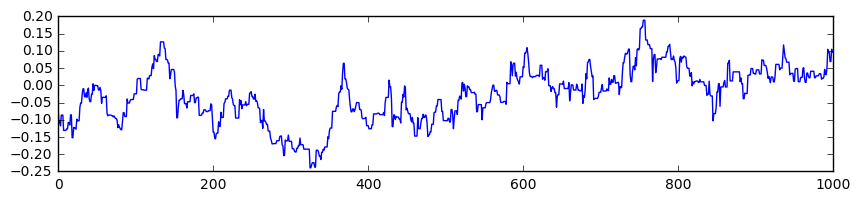

In [39]:
fig = plt.figure(figsize=(10, 2), dpi=200)
trace = HMC_draws[1000:2000, 1]
plt.plot(trace)

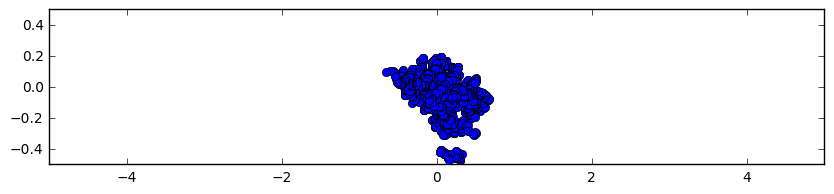

In [40]:
fig = plt.figure(figsize=(10, 2), dpi=200)
plt.xlim(-5, 5)
plt.ylim(-0.5, 0.5)
plt.plot(HMC_draws[:, 0], HMC_draws[:, 1], 'o')

In [77]:
from surrogate import ELM

In [78]:
fun = ELM(dim=50, size=2000)

In [85]:
target = -energy.reshape((2000, 1))
print(target.shape)
fun.train(HMC_draws, target, 0.001)

(2000, 1)


In [86]:
grad_hat = np.zeros((1000, 50))
for i in range(1000):
    grad_hat[i, :] = fun.gradient(training[i, :])

In [87]:
print(np.mean(np.square(gradient[0:1000, :] - grad_hat)))

109.264474494


In [88]:
draws = hamiltonian(toy, 2000, 10, 0.01, fun)[0]

200 iterations with acceptance probability 0.525
400 iterations with acceptance probability 0.685
600 iterations with acceptance probability 0.67
800 iterations with acceptance probability 0.625
1000 iterations with acceptance probability 0.65
1200 iterations with acceptance probability 0.655
1400 iterations with acceptance probability 0.7
1600 iterations with acceptance probability 0.525
1800 iterations with acceptance probability 0.58
2000 iterations with acceptance probability 0.665


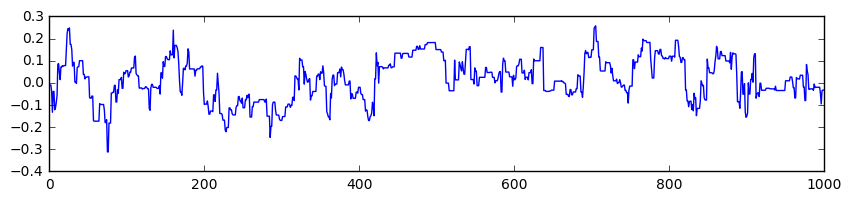

In [89]:
fig = plt.figure(figsize=(10, 2), dpi=200)
trace = draws[1000:2000, 0]
plt.plot(trace)

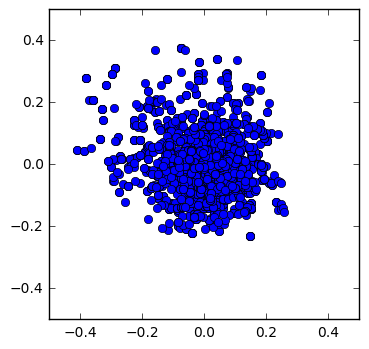

In [90]:
fig = plt.figure(figsize=(4, 4), dpi=200)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.plot(draws[:, 0], draws[:, 1], 'o')